# AutoML Overview

#### AutoML is a library that can be used to solve machine learning problems involving structured data. The current version supports classification and regression tasks. 

### What is Automatic in AutoML?

- **Dataset Schema Inference**: Automatically categorizes columns into numerical, categorical, and datetime entities to apply appropriate preprocessing techniques.
- **Feature Preprocessing Pipeline**: Given the task (classification/regression), AutoML applies a series of predefined operations.
- **Model Training**: Runs multiple models with different configurations that can be tuned.
- **Model Registration**: The Experiments and Models are automatically registered using the MLOps APIs

## Processes Followed in AutoML

### Understanding the Dataset

- Infer the schema of the dataset to categorize columns into numerical, categorical, and datetime entities.

### Preprocessing Techniques

- **Missing Value Imputation**: Based on the inferred schema.
- **Encoding of Numerical and Categorical Features**: Applies suitable encoding techniques for numerical and categorical features.
- **Transformations to Handle Skew**: Apply transformations to handle skewness in the data. Note: This step is not fully automated currently. 
- **Handle Outliers**: Apply transformations to handle outliers in the data. 

### Model Building

- **Model Support**: Enabled support for scikit-learn and XGBoost models.
- **Feature Selection**: Using Recursive Feature Elimination (RFE) technique.
- **Cross Validation**: To ensure model generality and prevent overfitting.
- **Hyperparameter Tuning**: Using Optuna for efficient hyperparameter optimization.
- **Ensemble Models**: Implements Voting and Stacking ensemble techniques.

## Results and Model Interpretability

- **Prediction Support**: Supports `predict()` and `predict_proba()` wherever applicable.
- **Feature Importance**: Using SHAP and/or permutation importance for feature interpretability.
- **Artifact Storage**: All artifacts are stored in S3 / Azure blob storage.
- **Training Parameter Logging**: All training parameters are logged in ML Flow through MLOps APIs.

### Training Mode: 
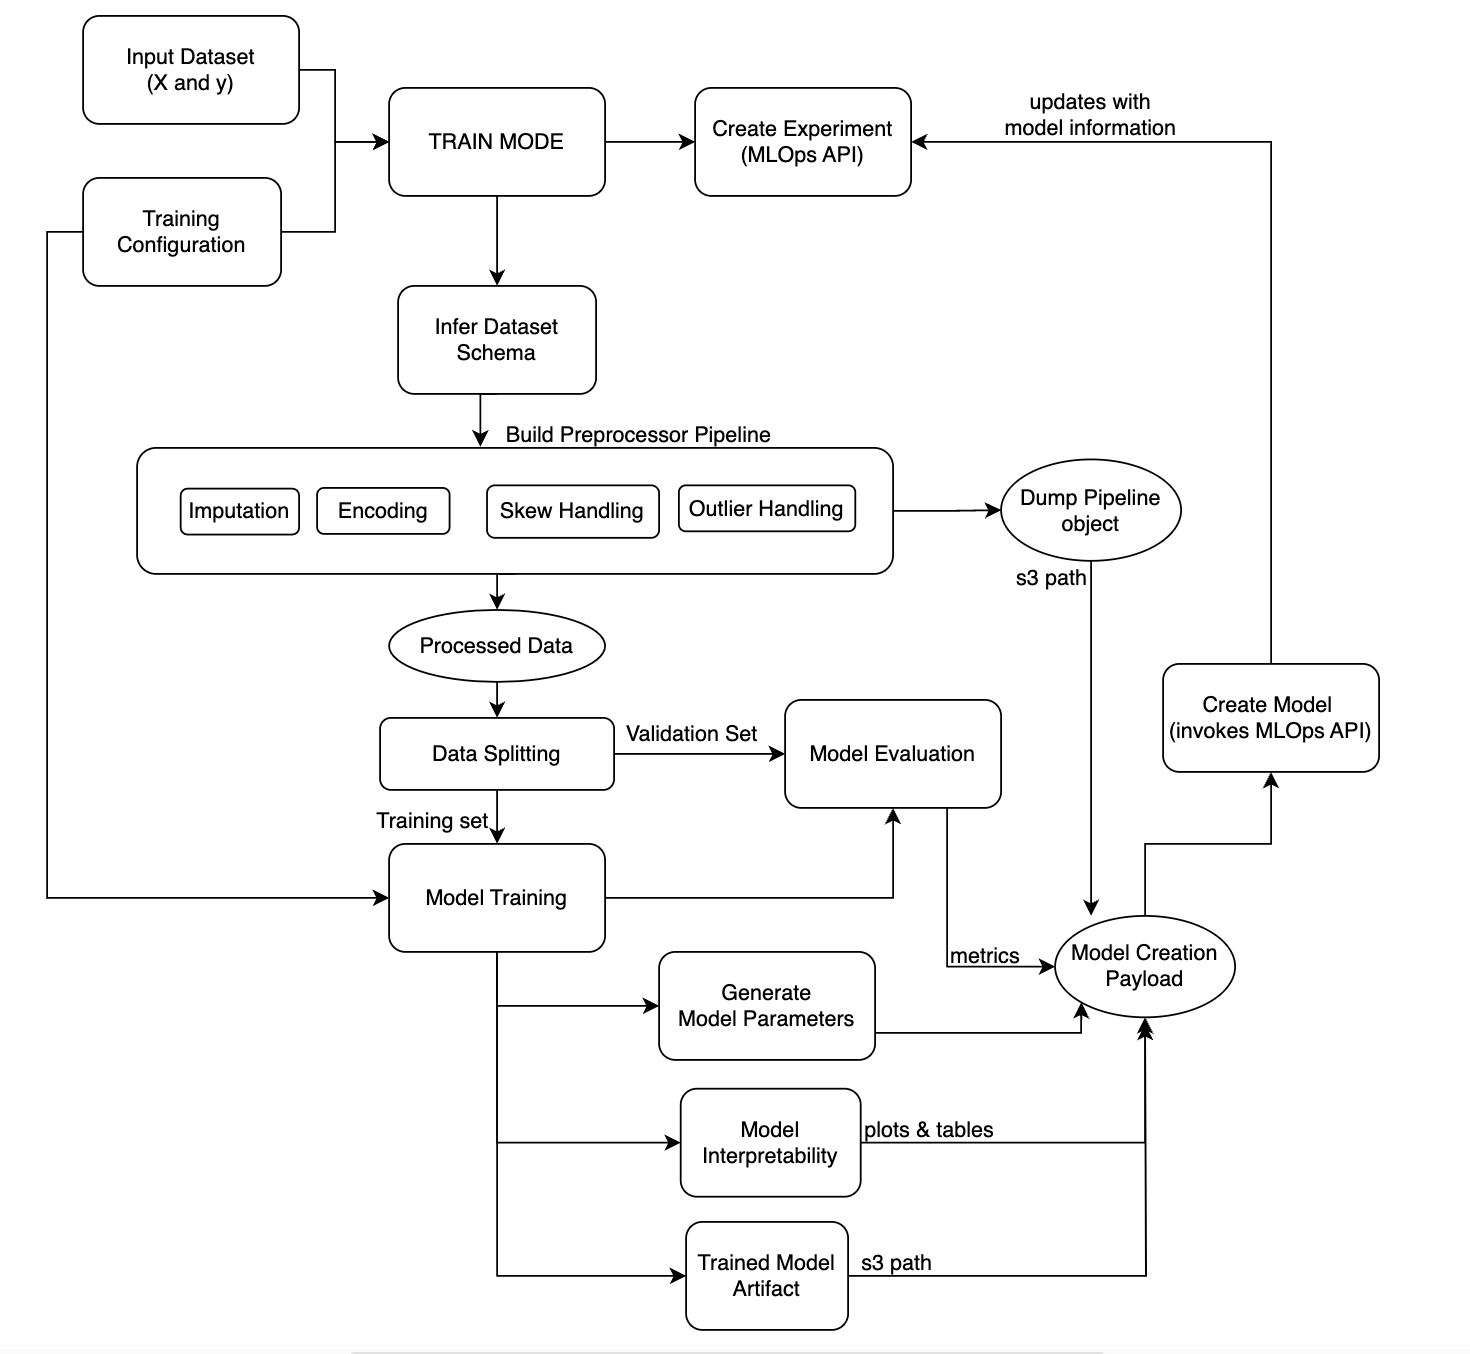

### Inference Mode: 
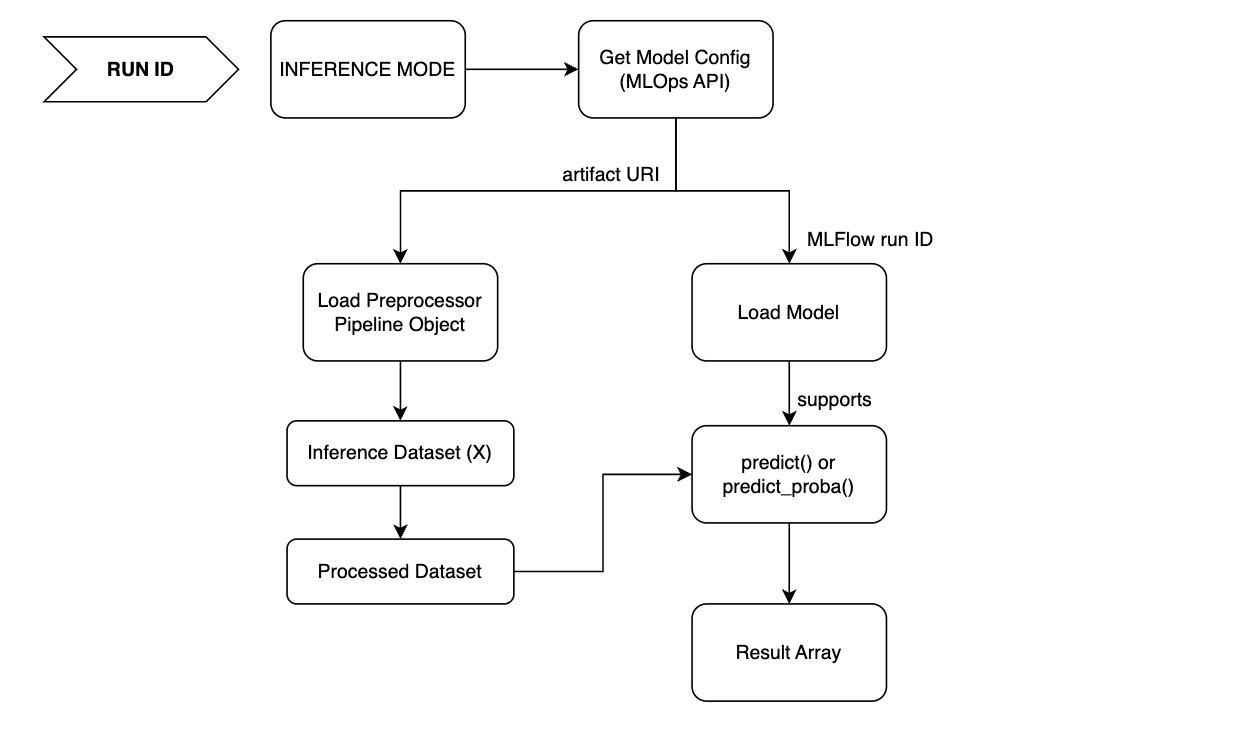

## AutoML Functionalities

AutoML provides functionalities similar to those found in traditional machine learning libraries such as scikit-learn. Here are the functionalities:

1. **_`fit()`_**:
    The function does the following
    1. _`Preprocessing`_: Data preprocessing tasks such as encoding categorical variables, imputing missing values, transforming skewed features, feature scaling and outlier handling.
    2. _`Model Training`_: Trains the machine learning model on the preprocessed data.
    3. _`Model Tracking`_: Tracks te model metadata, model training parameters, metrics, artifacts and interpretations using the MLOps api.

2. **_`predict()`_**:

    * Once the model is trained, the *`predict()`* function is used to make predictions on new data.

3. **_`predict_proba()`_**:

    * If the model supports (e.g., in classification tasks), the *`predict_proba()`* function returns the probabilities of the predictions.


### AutoML Training configuration

| AutoML Step                         | Description                                                                   | Default values                             |
|-------------------------------------|---------------------------------------------------------------------------------|---------------------------------------------|
| **ignore_columns_for_training**                  |    Specify the column names in the data that you want to ignore                                                                             | `[]`                                        |
| **fit_numerical_to_categorical**                  |    Specify the columns that you want to consider as categorical columns                                                                             | `[]`                                        |
| **preproc_steps**                  |    Specify the kind of transformations that you want to do for each column columns. This field is more customizable.                                                                             | `[]`                                        |
| **include_features**                | Specify the number of features that you want to use during training                                                                        | `all`
| **validation_split_size**                        |  Specify the validation split size                                                                          | `0.2` 
| **cv_folds**          | Specify the number of cross validation folds that you want to consider during training / None                                                                      | `None`                                      |                                       |                                      |
| **task**                            | Classification / Regression                                                    | Mandatory field                             |
| **ensemble**                        | Specify this if you want to perform ensembling                                                                            | `"false"`                                   |
| **stacking**                        | Specify this if you want to perform stacking                                                                            | `"false"`                                   |
| **tune**                            | Specify if you want to do hyperparamter tuning                                                                            | `"false"`                                   |
| **include_models**                  | - classification: LogisticRegression, KNN, NaiveBayesClassifier, DecisionTree, RandomForest, XGBoost<br>- regression: LinearRegression, KNN, LassoRegression, DecisionTree, RandomForest, XGBoost | LogisticRegression, XGBoost, DecisionTree (classification)<br>LinearRegression, XGBoost (regression) |
| **focus**                           | - classification: precision / recall / accuracy / f1<br>- regression: r2 / mean_squared_error / mean_absolute_error / root_mean_squared_error / explained_variance | `accuracy` (classification)<br>`r2` (regression) |
| **experiment_name**                 | str                                                                             | Mandatory                                   |

#### Understanding the config

1. The first three fields are used for the data preprocessing
2. The next nine fields are used for model training
3. The last field is used for model tracking

### Setting up preprocessing steps in the config

The `preproc_step` step field in the configuration consists of a list of dictionaries. Each dictionary specifies which transformations to apply for specified columns. Based on this `preproc_step` that you define a pipeline gets constructed which will be used both during training and inference. 

The AutoML preprocessor currently supports five different preprocessing steps, each with various methods. Below are the supported steps, methods, and their values for use in configuration files:

| Step                 | Methods                                                                                   |
|----------------------|-------------------------------------------------------------------------------------------|
| **1. Imputing**      | Mean, Median, Mode                                                                        |
| **2. Encoding**      | One-Hot Encoder, Label Encoder                                                            |
| **3. Scaling**       | Standard Scaler, Min-Max Scaler                                                           |
| **4. Skew Handling** | Log, Cube root, Square root, Reciprocal, Exponential, Inverse, Absolute, Square, Cube, Yeo-Johnson, Box-cox |
| **5. Outlier Handling** | Robust                                                                                |


The below table shows the actual values to be used in the config
| Step                 | Methods                                                                                   |
|----------------------|-------------------------------------------------------------------------------------------|
| **1. impute**      | mean, median, mode                                                                        |
| **2. encode**      | one_hot, label                                                           |
| **3. scale**       | standard, min_max                                                          |
| **4. skew** | log, cube_root, square_root, reciprocal, exponential, inverse, absolute, square, cube, yeo_johnson, box_cox |
| **5. outlier** | robust    

### Example Config and its Pipeline Representation

```python
config = {
    "ignore_columns_for_training": [],
    "fit_numerical_to_categorical": [],
    "preproc_steps": [
        {
            'step': 'impute',
            'method': 'mean',
            'columns_to_include': ['Age', 'Fare']
        },
        {
            'step': 'impute',
            'method': 'mode',
            'columns_to_include': ['Sex', 'Pclass']
        },
        {
            'step': 'encode',
            'method': 'one_hot',
            'columns_to_include': ['Sex', 'Pclass']
        },
        {
            'step': 'scale',
            'method': 'standard',
            'columns_to_include': ['Age', 'Fare']
        },
        {
            'step': 'scale',
            'method': 'min_max',
            'columns_to_include': ['Age', 'Fare']
        },
        {
            'step': 'outlier',
            'method': 'robust',
            'columns_to_include': ['Age', 'Fare']
        },
        {
            'step': 'skew',
            'method': 'yeo_johnson',
            'columns_to_include': ['Age', 'Fare']
        }
    ],
    
    'include_features': 6,
    'validation_split_size': 0.2,
    'cv_folds': 7,
    'task': 'Classification',
    'ensemble': True,
    'stacking': False,
    'tune': True,
    'include_models': ['LogisticRegression', 'KNN'],
    'focus': 'recall',
    'experiment_name': 'titanic-experiment'
}
```

The pipeline that gets contructed from the `preproc_steps` in the above config looks something like this

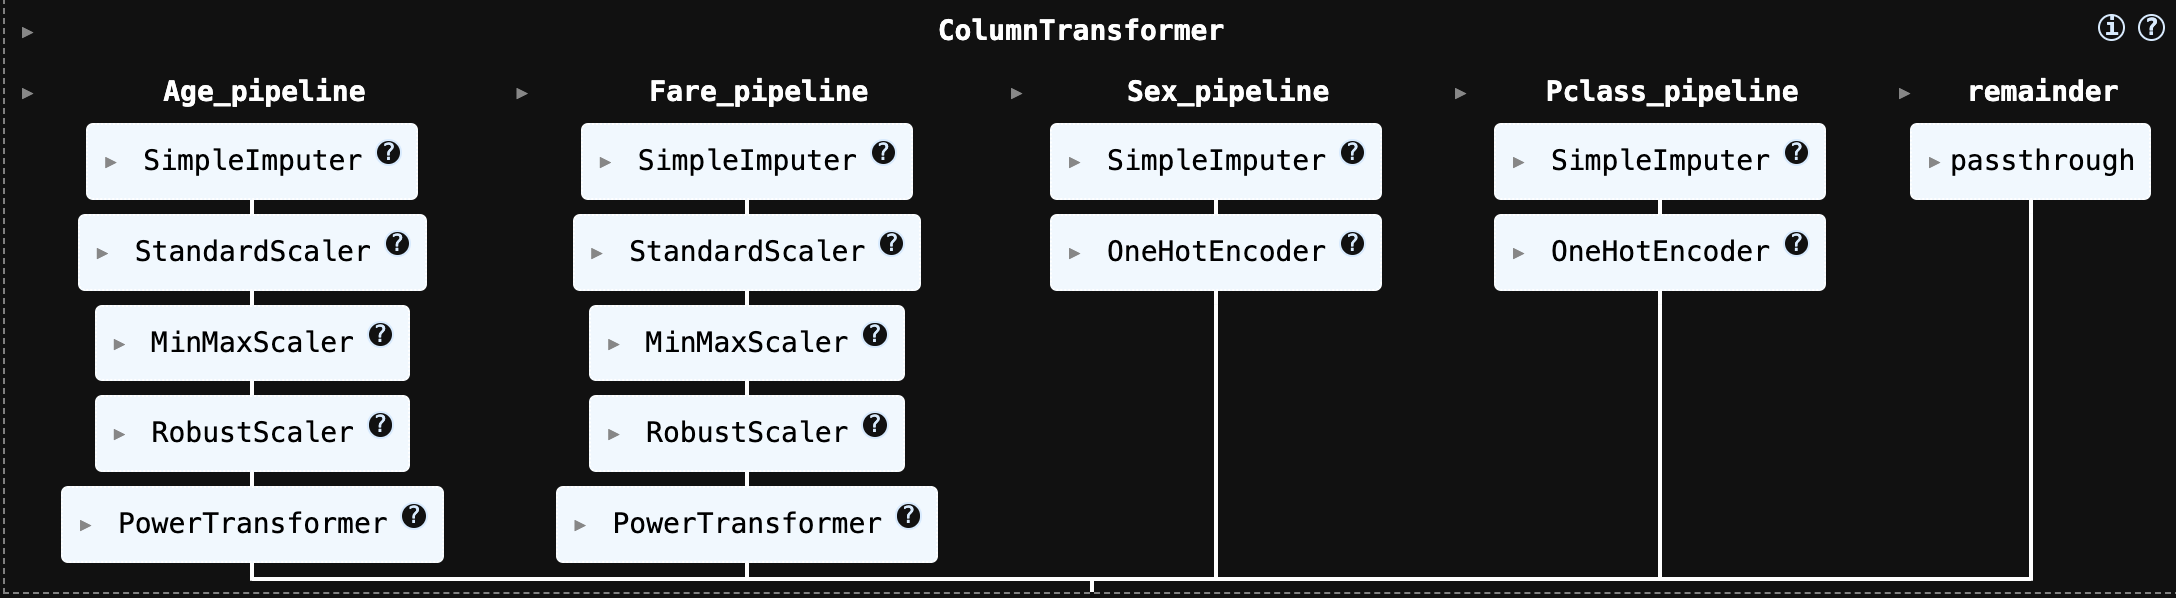

In python scikit-learn package the pipeline that gets constructed looks like this

```python
ColumnTransformer(
    remainder='passthrough',
    transformers=[('Age_pipeline',
                    Pipeline(steps=[('Step 1 - impute',
                                    SimpleImputer()),
                                    ('Step 2 - scale',
                                    StandardScaler()),
                                    ('Step 3 - scale',
                                    MinMaxScaler()),
                                    ('Step 4 - outlier',
                                    RobustScaler()),
                                    ('Step 5 - skew',
                                    PowerTransformer())]),
                                    ['Age']),
                ('Fare_pipeline',
                    Pipeline(steps=[('Step 1 - impute',
                                    SimpleImputer()),
                                    ('Step 2 - scale',
                                    Standa...
                                    ('Step 4 - outlier',
                                    RobustScaler()),
                                    ('Step 5 - skew',
                                    PowerTransformer())]),
                                    ['Fare']),
                ('Sex_pipeline',
                    Pipeline(steps=[('Step 1 - impute',
                                    SimpleImputer(strategy='most_frequent')),
                                    ('Step 2 - encode',
                                    OneHotEncoder())]),
                                    ['Sex']),
                ('Pclass_pipeline',
                    Pipeline(steps=[('Step 1 - impute',
                                    SimpleImputer(strategy='most_frequent')),
                                    ('Step 2 - encode',
                                    OneHotEncoder())]),
                                    ['Pclass'])])
```

### MLOps and MLflow

AutoML uses in house built MLOps APIs to interact with Mlflow which is a primary model store that is used for model tracking, versioning and storing model artifacts. 

MLOps is a set of practices that aims to integrate machine learning (ML) systems into the broader software development and operational lifecycle. It enables seamless deployment, monitoring, and management of Machine Learning (ML) models in production environments.

MLflow is a tool that simplifies processes to streamline the ML lifecycle. It provides a unified platform for model development, deployment, and management.

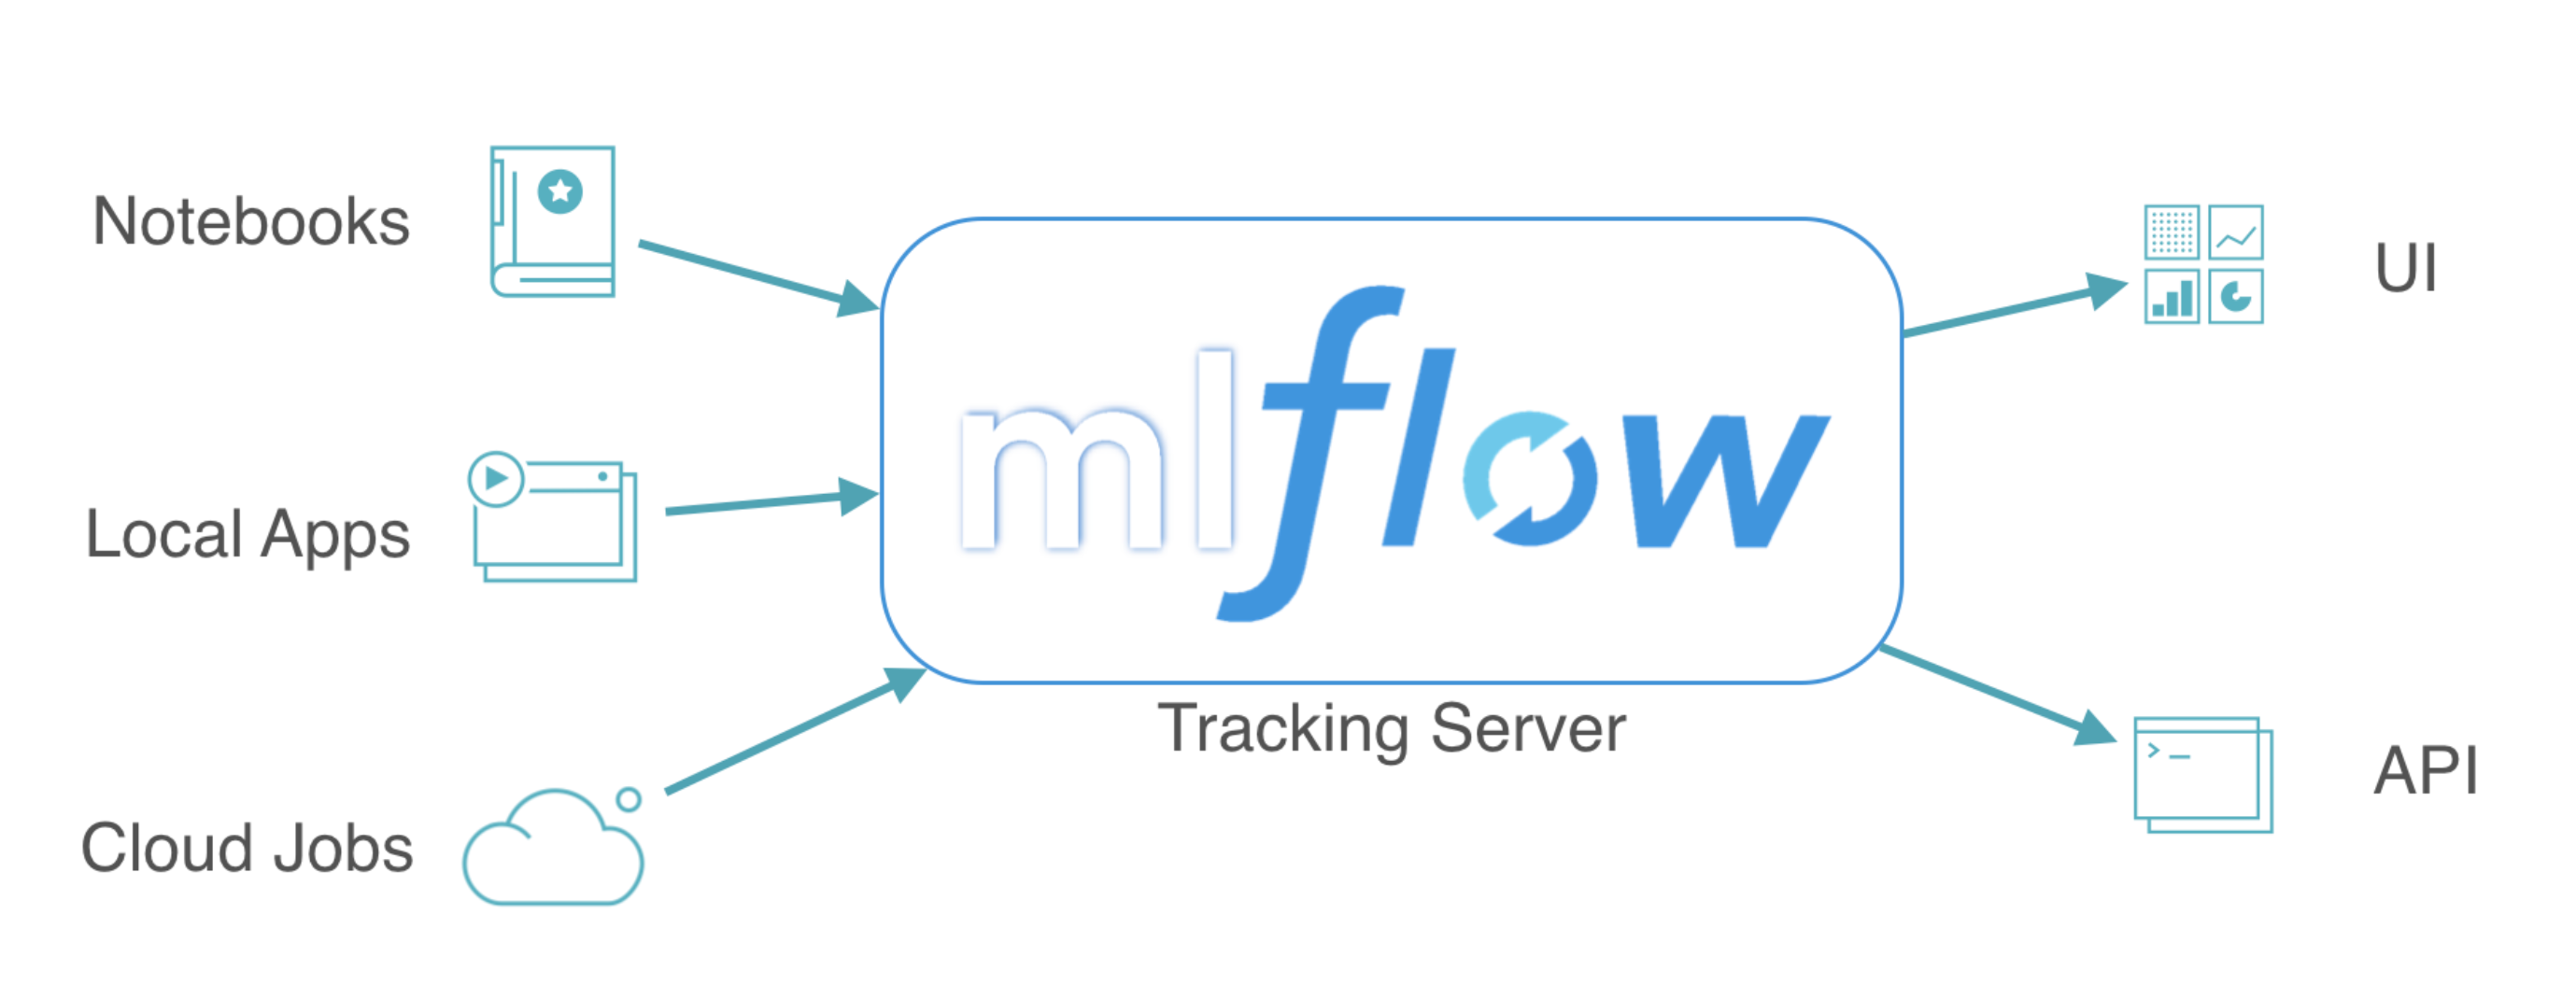


To know more about the concepts about MLOps and MLflow refer the below documentations
1. MLOps - https://madstreetden.atlassian.net/wiki/spaces/TDP/pages/3093757959/MLOps
2. MLOps Release Docs - https://madstreetden.atlassian.net/wiki/spaces/TDP/pages/3584917565/MLOps+Release+Docs
3. Mlflow - https://mlflow.org/docs/latest/index.html


### Polycloud

AutoML uses the polycloud library which is a in-house built library used to store the mlflow artifacts across different cloud providers.

Refer - https://github.com/mad-street-den/polycloud

### AutoML Inference config

| AutoML Step                         | Description                                                                   | Default values                             |
|-------------------------------------|---------------------------------------------------------------------------------|---------------------------------------------|
| **experiment_name**                  |    Specify the name of the experiment under which the model is logged in Mlflow                                                                             | `mandatory`                                        |
| **model_name**                  |    Specify the run name of the model in mlflow of which you want it to be used for  inference / predictions                                                                           | `mandatory`                                        |

#### Example config
```python
config = {
    "experiment_name": "your-experiment-name",
    "model_name" : "your-model-name"
}
```

### How to use

To know about how to use the AutoML framework for your data refer the other notebook `AutoML-Getting-started.ipynb`